# Inference test

Goal: test inference on a single image.

In [139]:
import cv2
from flask import Flask, request, jsonify
import numpy as np
from fastai.transforms import tfms_from_model, CropType
from torchvision.models.resnet import resnet101
from fastai.core import V, to_np
from matplotlib import patches, patheffects
import torch
from scipy.special import expit

In [128]:
def bb_hw(bb):
    ymin, xmin, ymax, xmax = bb
    return np.array([xmin, ymin, xmax - xmin + 1, ymax - ymin + 1])

In [129]:
def draw_text(ax, xy, txt, sz=14):
    text = ax.text(*xy, txt,
        verticalalignment='top', color='white', fontsize=sz, weight='bold')
    draw_outline(text, 1)

In [130]:
def draw_rect(ax, b, color='white'):
    patch = ax.add_patch(patches.Rectangle(b[:2], *b[-2:], fill=False, edgecolor=color, lw=2))
    draw_outline(patch, 4)

In [131]:
def draw_outline(o, lw):
    o.set_path_effects([patheffects.Stroke(
        linewidth=lw, foreground='black'), patheffects.Normal()])

In [135]:
def show_img(im, figsize=None, ax=None):
    if not ax: fig,ax = plt.subplots(figsize=figsize)
    ax.imshow(im)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    return ax

In [90]:
model = torch.load(
    '../data/models/torch.resnet101-val-loss-29.914882', map_location='cpu')
model.eval()

size = 224

trn_tfms, val_tfms = tfms_from_model(resnet101, size, crop_type=CropType.NO)
alphabet = list('abcdefghijklmnopqrstuvwxyz') + ['na']
itoa = {c: l for c, l in enumerate(alphabet)}

In [160]:
img = cv2.imread('../data/yolo/pAz_mIjHglw-frame-160.jpg').astype(np.float32) / 255

In [161]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

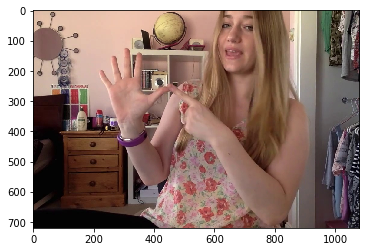

In [162]:
plt.imshow(img)

In [163]:
im = val_tfms(img)

In [164]:
output = model(V(im[None]).cpu())

In [165]:
output = to_np(output)

In [166]:
bb_i = expit(output[:, :4]) * size
c_i = output[:, 4:]

class_pred = itoa[np.argmax(c_i)]

In [167]:
print(class_pred)

a


In [168]:
print(bb_i[0])

[ 35.49598  47.20491 145.22484 127.13619]


In [172]:
height, width, channels = img.shape

In [174]:
y, x, y2, x2 = bb_i[0]

In [177]:
bb_scaled = [y / size * height, x / size * width, y2 / size * height, x2 / size * width]

In [178]:
bb_scaled

[114.09421920776367, 227.5951031276158, 466.79412296840127, 612.978070122855]

In [185]:
bb_np = bb_hw(bb_scaled)
bb_np_int = [int(b) for b in bb_np]

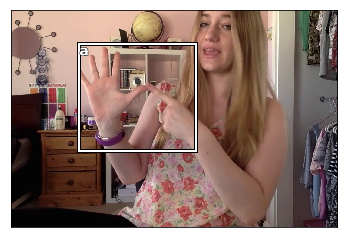

In [186]:
fig, ax = plt.subplots()

show_img(img, ax=ax)
draw_rect(ax, bb_np_int)
draw_text(ax, bb_np_int[:2], class_pred)

In [188]:
bb_np_int

[227, 114, 386, 353]